In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("../data/raw/complaints.csv")
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_3256\2649679485.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/complaints.csv")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


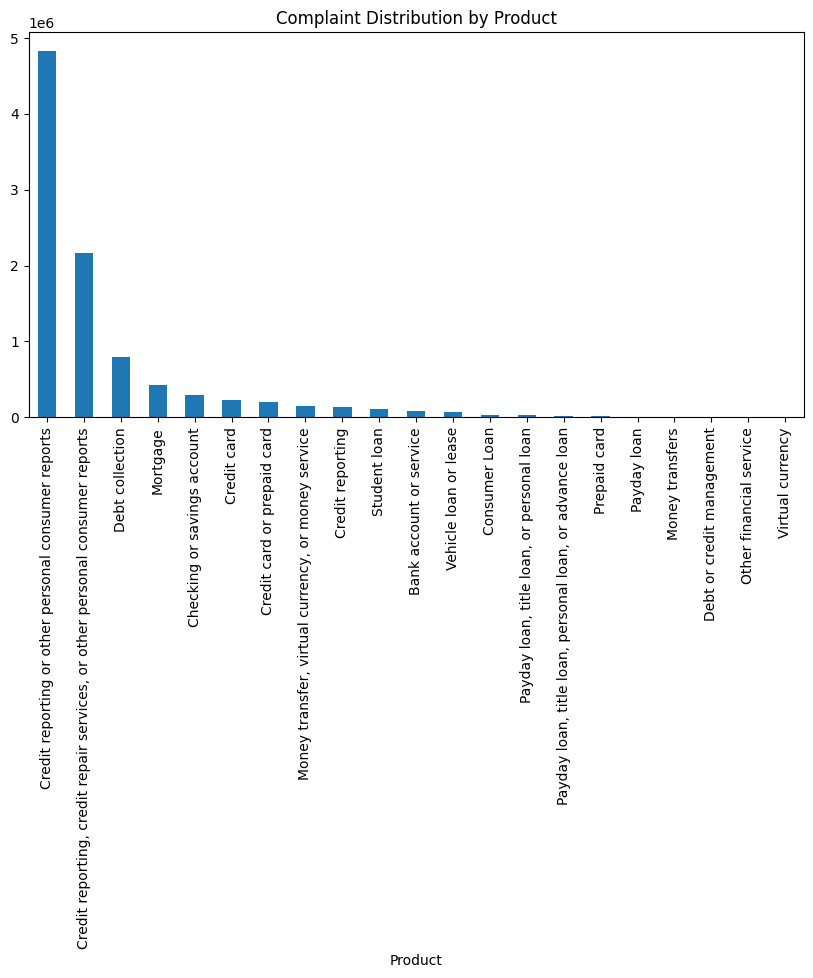

In [7]:
df['Product'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Complaint Distribution by Product")
plt.show()

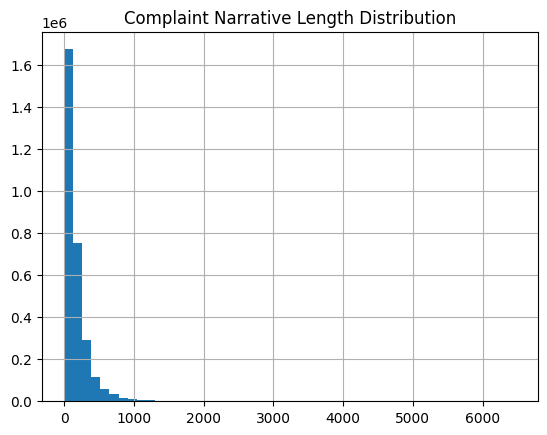

In [8]:
df['narrative_length'] = df['Consumer complaint narrative'].dropna().apply(
    lambda x: len(x.split())
)

df['narrative_length'].hist(bins=50)
plt.title("Complaint Narrative Length Distribution")
plt.show()


In [9]:
df['has_narrative'] = df['Consumer complaint narrative'].notna()
df['has_narrative'].value_counts()

has_narrative
False    6629041
True     2980756
Name: count, dtype: int64

In [10]:
TARGET_PRODUCTS = [
    "Credit card",
    "Personal loan",
    "Savings account",
    "Money transfer",
    "Money transfers"
]

filtered_df = df[
    (df['Product'].isin(TARGET_PRODUCTS)) &
    (df['Consumer complaint narrative'].notna())
]

In [11]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"i am writing to file a complaint.*", "", text)
    text = re.sub(r"[^a-z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)


C:\Users\hp\AppData\Local\Temp\ipykernel_3256\3753075664.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)


In [14]:
filtered_df.to_csv("../data/processed/filtered_complaints.csv", index=False)